# Tensorflow 2 Intro

##  GPU check

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__
print(tf.config.experimental.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Get Dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Get the data shape

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0])

Take a look into the data

In [ ]:
plt.imshow(x_train[0],cmap = plt.cm.binary)

## Data Modify

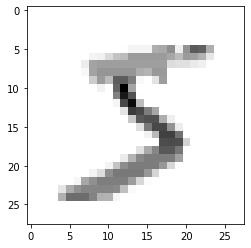

In [5]:
x_train = tf.keras.utils.normalize(x_train)
x_test  = tf.keras.utils.normalize(x_test)

plt.imshow(x_train[0],cmap = plt.cm.binary)

## Build the train model

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(128, input_shape = (30,30,1), activation=tf.nn.relu)) # hidden layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer 2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer

## Train the model

In [23]:
model.compile(
    optimizer= "Adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2565 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1032 - accuracy: 0.9680
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0710 - accuracy: 0.9776


## Validation

In [ ]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

## Save model

In [ ]:
model.save("num_reader.model")

## Load Model

In [ ]:
new_model = tf.keras.models.load_model("num_reader.model")

In [ ]:
predictions = new_model.predict(x_test)

In [ ]:
print(predictions.shape)

In [ ]:
import numpy as np
predict_num = np.argmax(predictions, axis=1)
print(predict_num.shape)

In [ ]:
plt.imshow(x_test[4], cmap=plt.cm.binary)

In [ ]:
print(predict_num[4])